In [1]:
# Step 1: imports and loading
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)   # features
y_names = pd.Series(iris.target_names[iris.target], name='species')  # readable labels

print("Feature columns:", X.columns.tolist())
print("First 5 rows:")
print(X.head())
print("\nExample labels (first 10):")
print(y_names.head(10))


Feature columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Example labels (first 10):
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: species, dtype: object


In [2]:
#  check missing values
print("Missing values per feature:\n", X.isna().sum())


Missing values per feature:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
# impute missing values
from sklearn.impute import SimpleImputer

# Create a copy and introduce a few NaNs (demonstration only)
X_missing = X.copy()
np.random.seed(42)
for _ in range(5):
    i = np.random.randint(0, X_missing.shape[0])
    j = np.random.randint(0, X_missing.shape[1])
    X_missing.iat[i, j] = np.nan

print("Missing per column (demo):\n", X_missing.isna().sum())

# Impute numeric missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X_missing)  # returns numpy array
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

print("\nAfter imputation, missing per column:\n", X_imputed.isna().sum())


Missing per column (demo):
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    3
petal width (cm)     2
dtype: int64

After imputation, missing per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
# Encode labels (convert species names → numbers)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_names)   # transforms species names -> integers

print("Classes (encoder):", encoder.classes_)
# Example mapping: encoder.classes_[0] corresponds to label 0, etc.
print("First 10 encoded labels:", y_encoded[:10])


Classes (encoder): ['setosa' 'versicolor' 'virginica']
First 10 encoded labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (120, 4)
Test shape: (30, 4)


In [ ]:
# Training a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Model trained.")


Model trained.


In [ ]:
# Making predictions on test set
y_pred = clf.predict(X_test)
print("Predictions for test set:", y_pred)
print("True labels:", y_test)


Predictions for test set: [0 2 2 1 0 1 0 1 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 1 2 2 1 0 2 0]
True labels: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [ ]:
# Evaluate: accuracy, precision, recall (+ classification report)
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision_macro:.4f} (macro)")
print(f"Recall:    {recall_macro:.4f} (macro)\n")

print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy:  0.8667
Precision: 0.8727 (macro)
Recall:    0.8667 (macro)

Classification report:

              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.80      0.80      0.80        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



Confusion matrix (rows=true, cols=predicted):
 [[9 1 0]
 [0 8 2]
 [0 1 9]]


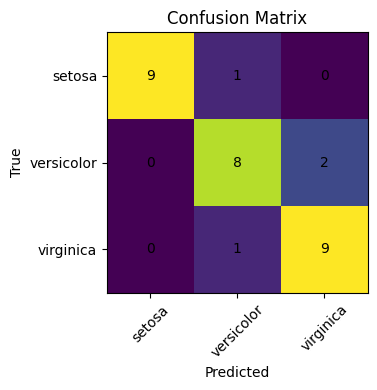

In [ ]:
# Confusion matrix (visual + numeric)
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix (rows=true, cols=predicted):\n", cm)

# Simple plot
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(encoder.classes_)), encoder.classes_, rotation=45)
plt.yticks(np.arange(len(encoder.classes_)), encoder.classes_)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.tight_layout()
plt.show()


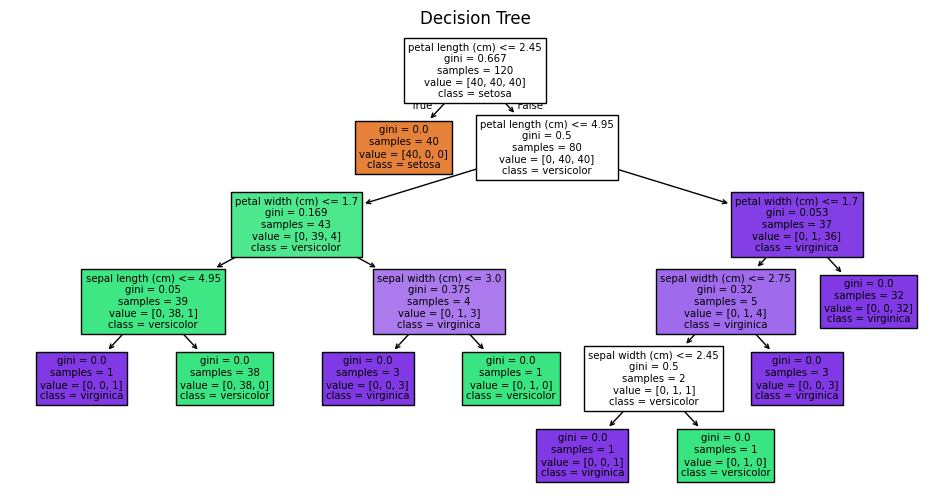

In [ ]:
# Visualize the trained Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=encoder.classes_, filled=True)
plt.title("Decision Tree")
plt.show()
